In [ ]:
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

path = '/content/AirPassengers.csv'
data = pd.read_csv(path, index_col='Month')
data.head(20)

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

"""
Null Hypothesis: The time series is stationary.

Alternate Hypothesis: TThe time series is not stationary.
"""

# Assuming you have a time series 'ts'
result = adfuller(data['#Passengers'])

# Extract the p-value from the result
p_value = result[1]

# Define a significance level (e.g., 0.05)
alpha = 0.05

# Compare the p-value to the significance level
if p_value <= alpha:
    print("Reject the null hypothesis (H0): The time series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0): The time series is non-stationary.")


Fail to reject the null hypothesis (H0): The time series is non-stationary.


In [9]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

"""
Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).
"""

# Assuming you have a time series 'ts'
result = kpss(data['#Passengers'])

# Extract the p-value from the result
p_value = result[1]

# Define a significance level (e.g., 0.05)
alpha = 0.05

# Compare the p-value to the significance level
if p_value <= alpha:
    print("Reject the null hypothesis (H0): The time series is not stationary .")
else:
    print("Fail to reject the null hypothesis (H0): The time series is stationary.")


Reject the null hypothesis (H0): The time series is not stationary around a deterministic trend.


<Axes: xlabel='Month'>

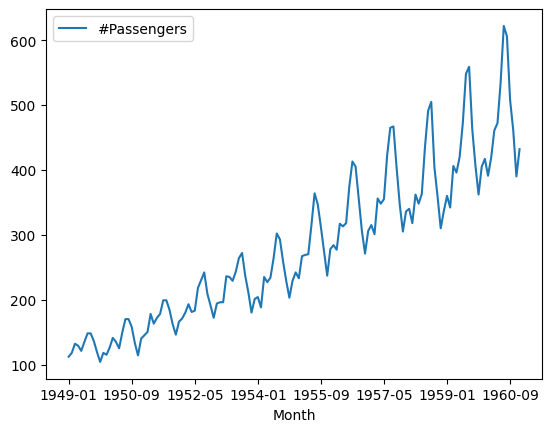

In [10]:
data.plot()

#Finding the best d

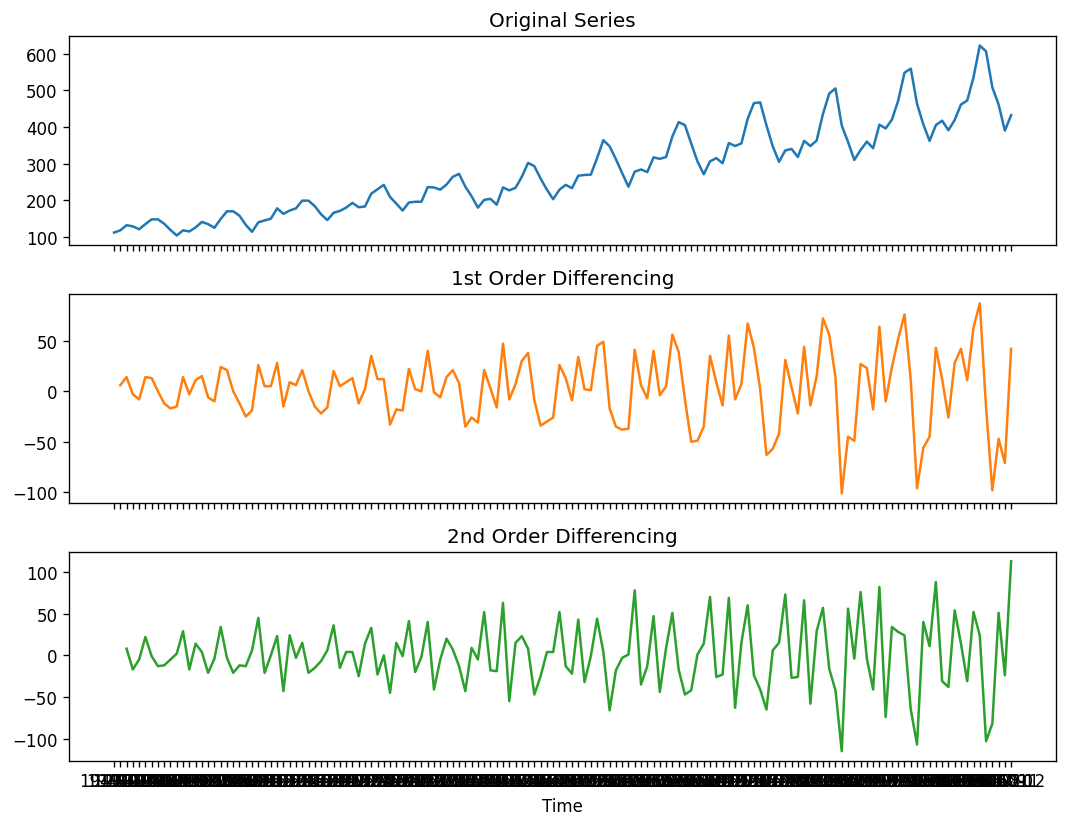

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax1.plot(data['#Passengers'], color='tab:blue')
ax1.set_title('Original Series')

# 1st Differencing
ax2.plot(data['#Passengers'].diff(), color='tab:orange')
ax2.set_title('1st Order Differencing')

# 2nd Differencing
ax3.plot(data['#Passengers'].diff().diff(), color='tab:green')
ax3.set_title('2nd Order Differencing')

# Show the x-axis on the bottom subplot
ax3.set_xlabel('Time')

plt.tight_layout()
plt.show()


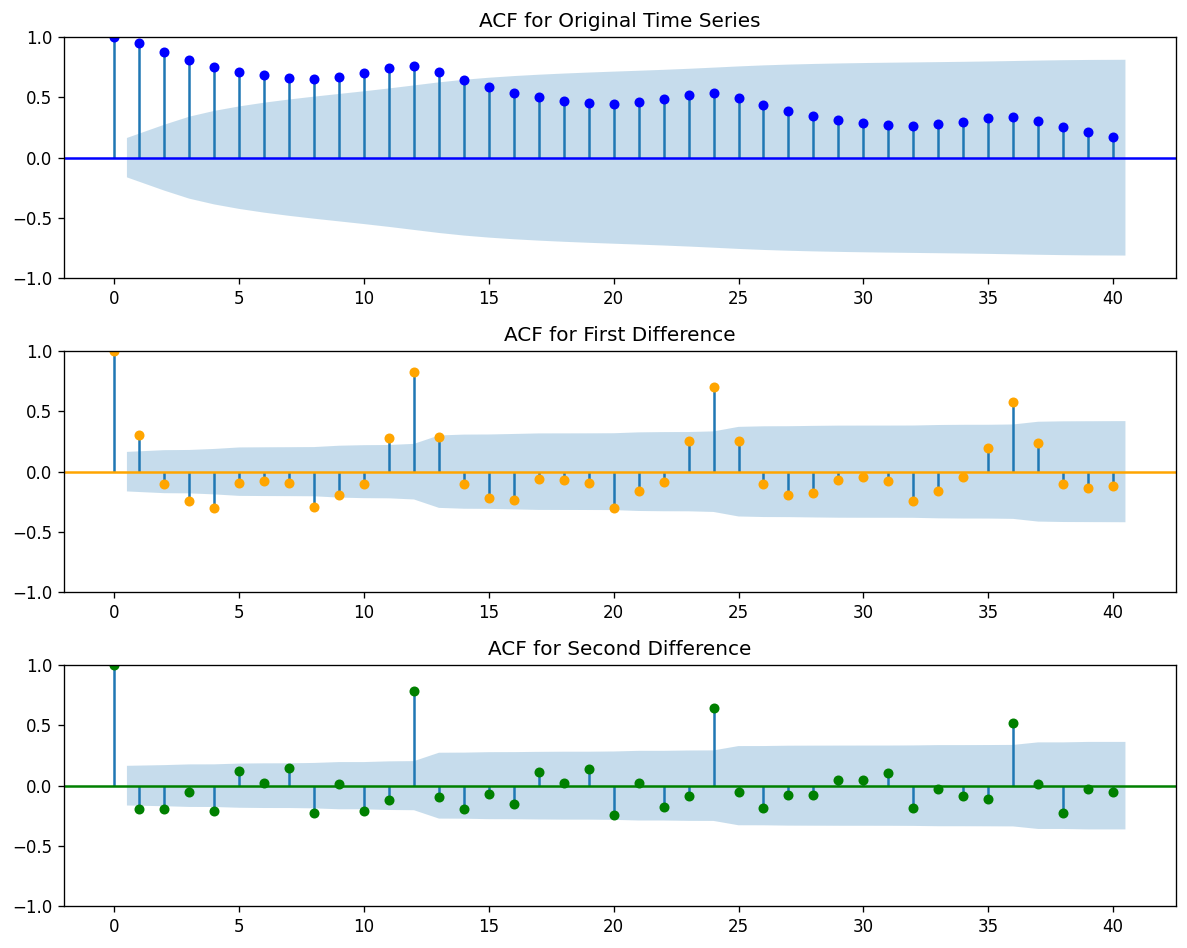

In [20]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Create subplots for each ACF plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 8))

# Plot ACF for the original time series in blue
plot_acf(data['#Passengers'], ax=ax1, title="ACF for Original Time Series", lags=40, color='blue')

# Plot ACF for the first difference in orange
plot_acf(data['#Passengers'].diff().dropna(), ax=ax2, title="ACF for First Difference", lags=40, color='orange')

# Plot ACF for the second difference in green
plot_acf(data['#Passengers'].diff().diff().dropna(), ax=ax3, title="ACF for Second Difference", lags=40, color='green')

# Show the plots
plt.tight_layout()
plt.show()


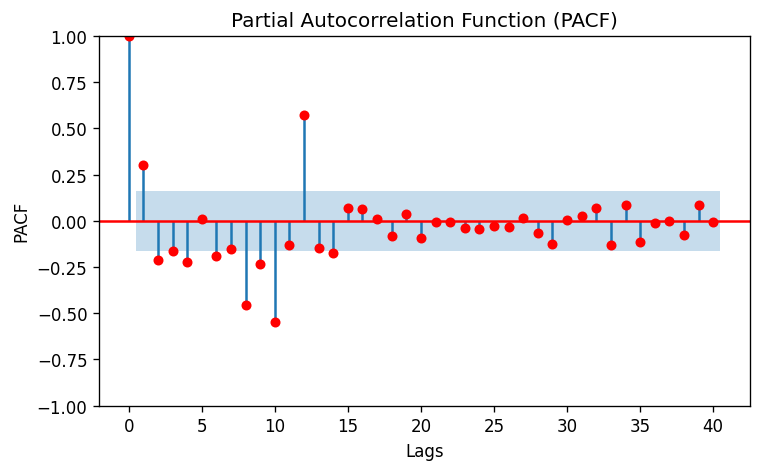

In [32]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Create a figure with a specified size
fig, ax = plt.subplots(figsize=(7, 4))

# Plot PACF for the time series data
plot_pacf(data['#Passengers'].diff().dropna(), lags=40, ax=ax, color='red') # As 1st order difference makes the data stationary

# Set plot title and labels
plt.title("Partial Autocorrelation Function (PACF)")
plt.xlabel("Lags")
plt.ylabel("PACF")

# Show the plot
plt.show()

### Select p = 1; We observe that the first lag is notably beyond the threshold, and the second one exceeds the significance threshold as well, although not to a considerable extent. Therefore, we can choose a p-value of 1 for the order.


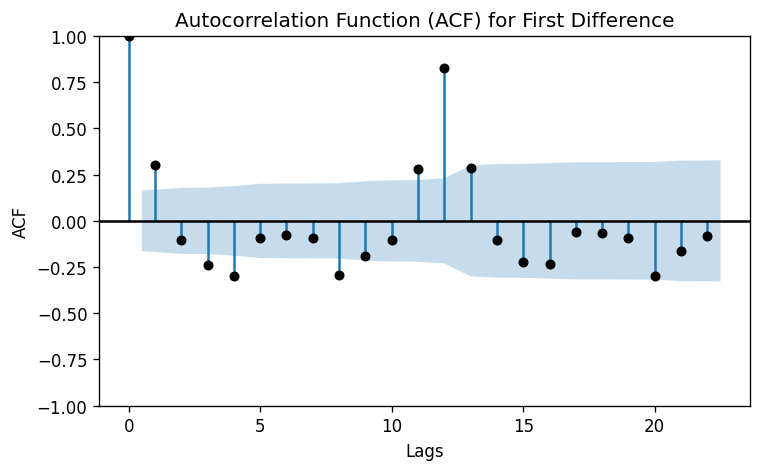

In [35]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(7, 4))
plot_acf(data['#Passengers'].diff().dropna(), ax = ax, color='black')

# Set plot title and labels
plt.title("Autocorrelation Function (ACF) for First Difference")
plt.xlabel("Lags")
plt.ylabel("ACF")

# Show the plot
plt.show()


###In this analysis, it's evident that two of the lag values extend beyond the significance threshold. Consequently, we can conclude that the ideal choice for our q (Moving Average) parameter is 2.

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# Initialize and fit the ARIMA model
model = ARIMA(data['#Passengers'], order=(1, 1, 2))
model_fit = model.fit()

# Display the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -688.749
Date:                Tue, 05 Sep 2023   AIC                           1385.498
Time:                        19:02:39   BIC                           1397.349
Sample:                    01-01-1949   HQIC                          1390.313
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5724      0.097      5.928      0.000       0.383       0.762
ma.L1         -0.3126      0.098     -3.198      0.001      -0.504      -0.121
ma.L2         -0.5078      0.069     -7.412      0.0

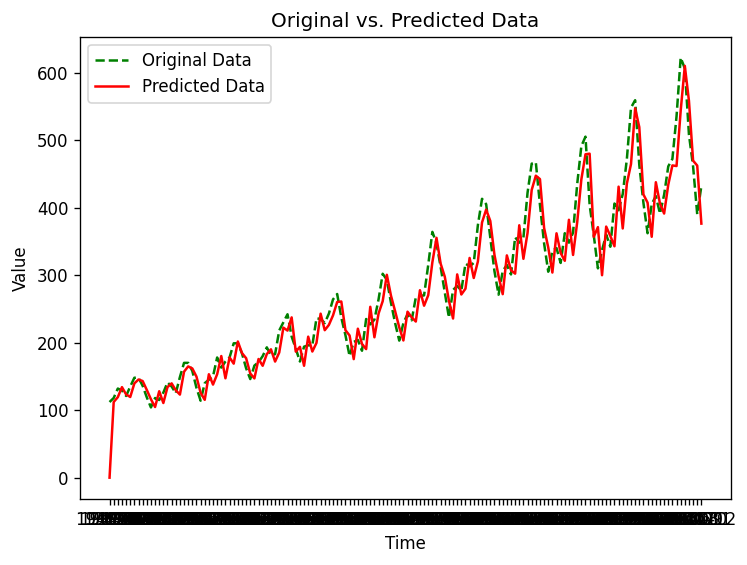

In [43]:
import matplotlib.pyplot as plt

# Assuming you've already fitted the ARIMA model and have 'model_fit'

# Get the predicted values
predicted_values = model_fit.fittedvalues

# Plot the original and predicted values
plt.figure(figsize=(7, 5))
plt.plot(data['#Passengers'], color='green',linestyle='--', label='Original Data')
plt.plot(predicted_values, color='red', label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original vs. Predicted Data')
plt.legend()
plt.show()

In [ ]:
!pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1076.519, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1069.440, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1064.624, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1076.271, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1058.834, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1061.078, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1066.203, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1058.246, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1063.646, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1068.536, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1058.648, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1057.3

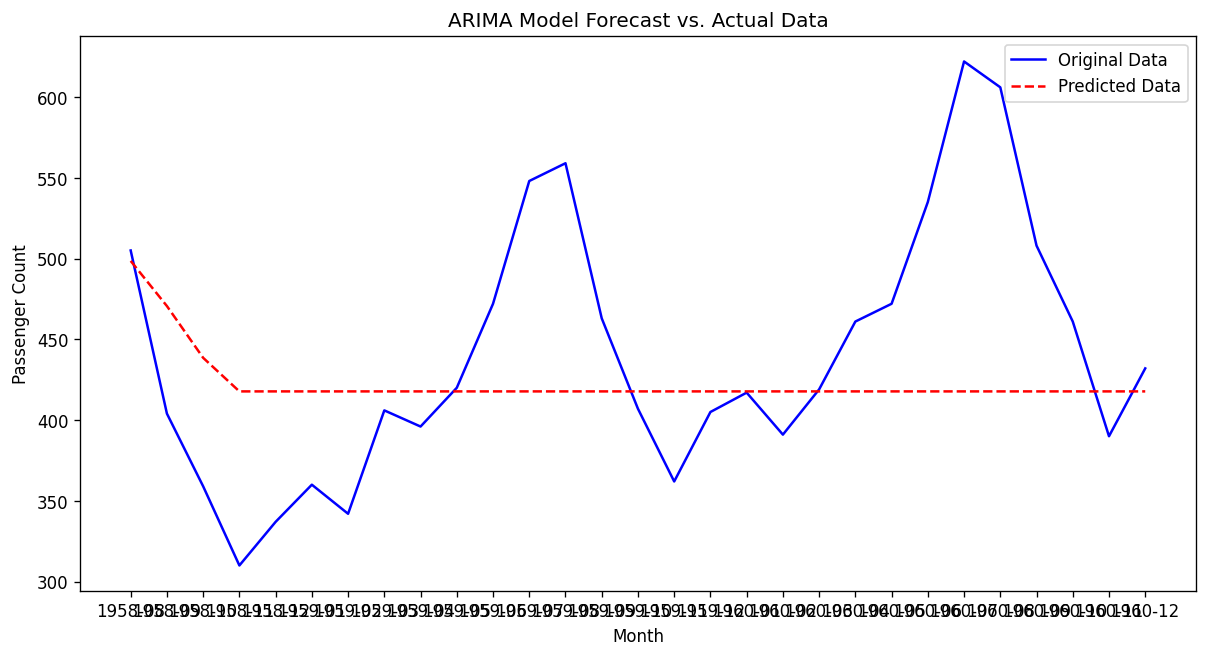

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Find the best ARIMA model order (p, d, q) using auto_arima
best_model = auto_arima(train_data, seasonal=False, suppress_warnings=True, stepwise=True, trace=True)
best_p, best_d, best_q = best_model.order

model = ARIMA(train_data, order=(best_p, best_d, best_q))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))
predictions = pd.Series(predictions, index=test_data.index)

# Plot the original and predicted data
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Original Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red', linestyle='dashed')
plt.legend()
plt.title('ARIMA Model Forecast vs. Actual Data')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.show()